# How quickly does semantics change

In [1]:
from koselleck import *

In [2]:
FN_DATA_PACEOFCHANGE

'/home/ryan/github/koselleck/data/data.semantic_change_over_decades.1run.v6-c20-halfdec.pkl'

In [3]:
DF=pd.read_pickle(FN_DATA_PACEOFCHANGE).reset_index()
words=set(DF.word)
idf=pd.DataFrame([{'word':w} for w in words])
# DF

In [4]:
DEFAULT_ROC_YMIN=1720

def do_measure_rateofchange(gdf,ymin=DEFAULT_ROC_YMIN,**y):
    distdf=get_distmatrix_rateofchange(DF, words=set(gdf.word), ymin=ymin)
    return test_novelty(distdf,**y)

def measure_rateofchange(idf,lim=None,num_proc=1,**kwargs):
    return pmap_groups(
        do_measure_rateofchange,
        idf.iloc[:lim].groupby('word'),
        num_proc=num_proc,
        desc='Measuring rate of change in all words',
        kwargs=kwargs
    )

In [5]:
res=do_measure_rateofchange(idf[idf.word=='attachment']).query('foote_size==5')
res

,year,foote_novelty,foote_size,p_peak,p_trough
150,1720,0.000000,5,1.00,0.99
151,1725,0.000000,5,1.00,0.99
152,1730,0.000000,5,1.00,0.99
153,1735,0.000000,5,1.00,0.99
154,1740,0.000000,5,1.00,0.99
155,1745,5.249609,5,1.00,1.00
156,1750,4.565860,5,1.00,1.00
157,1755,3.830566,5,1.00,1.00
158,1760,3.737057,5,1.00,1.00
159,1765,3.522026,5,1.00,1.00


In [ ]:
allres=measure_rateofchange(idf,lim=None,num_proc=4)
allres.to_pickle('data/data.words_by_rateofchange.v2.pkl')
allres
# allres = pd.read_pickle('data/data.words_by_rateofchange.pkl')

Measuring rate of change in all words [x4]:  10%|█         | 603/6010 [02:00<21:55,  4.11it/s]

In [15]:
odf=allres.reset_index().query('foote_size==5')
vsign=odf[(odf.p_peak<0.05) & (odf.foote_size==5)]
vsign.word.value_counts()

thing          5
son            5
fat            4
case           4
angel          4
              ..
originality    1
wheat          1
dose           1
endurance      1
mining         1
Name: word, Length: 930, dtype: int64

In [7]:
vsign[vsign.word=='attachment']

,word,year,foote_novelty,foote_size,p_peak,p_trough


In [8]:
vsign[vsign.word=='interest']

,word,year,foote_novelty,foote_size,p_peak,p_trough
442738,interest,1800.0,6.925120,5.0,0.03,1.0
442743,interest,1825.0,6.770387,5.0,0.04,1.0
442744,interest,1830.0,7.048804,5.0,0.02,1.0


In [9]:
vsign=pd.concat(grp.assign(glen=len(grp)) for i,grp in vsign.groupby('year'))
vsign

,word,year,foote_novelty,foote_size,p_peak,p_trough,glen
693,abbey,1745.0,5.006985,5.0,0.04,1.0,315
3188,abundance,1745.0,9.654242,5.0,0.00,1.0,315
3718,academy,1745.0,7.876977,5.0,0.00,1.0,315
11633,admiralty,1745.0,7.005982,5.0,0.00,1.0,315
11813,admiration,1745.0,9.622669,5.0,0.03,1.0,315
...,...,...,...,...,...,...,...
714706,road,1870.0,5.793487,5.0,0.01,1.0,28
721798,rule,1870.0,7.839575,5.0,0.01,1.0,28
734414,scherzo,1870.0,6.280280,5.0,0.01,1.0,28
746898,service,1870.0,9.844003,5.0,0.00,1.0,28


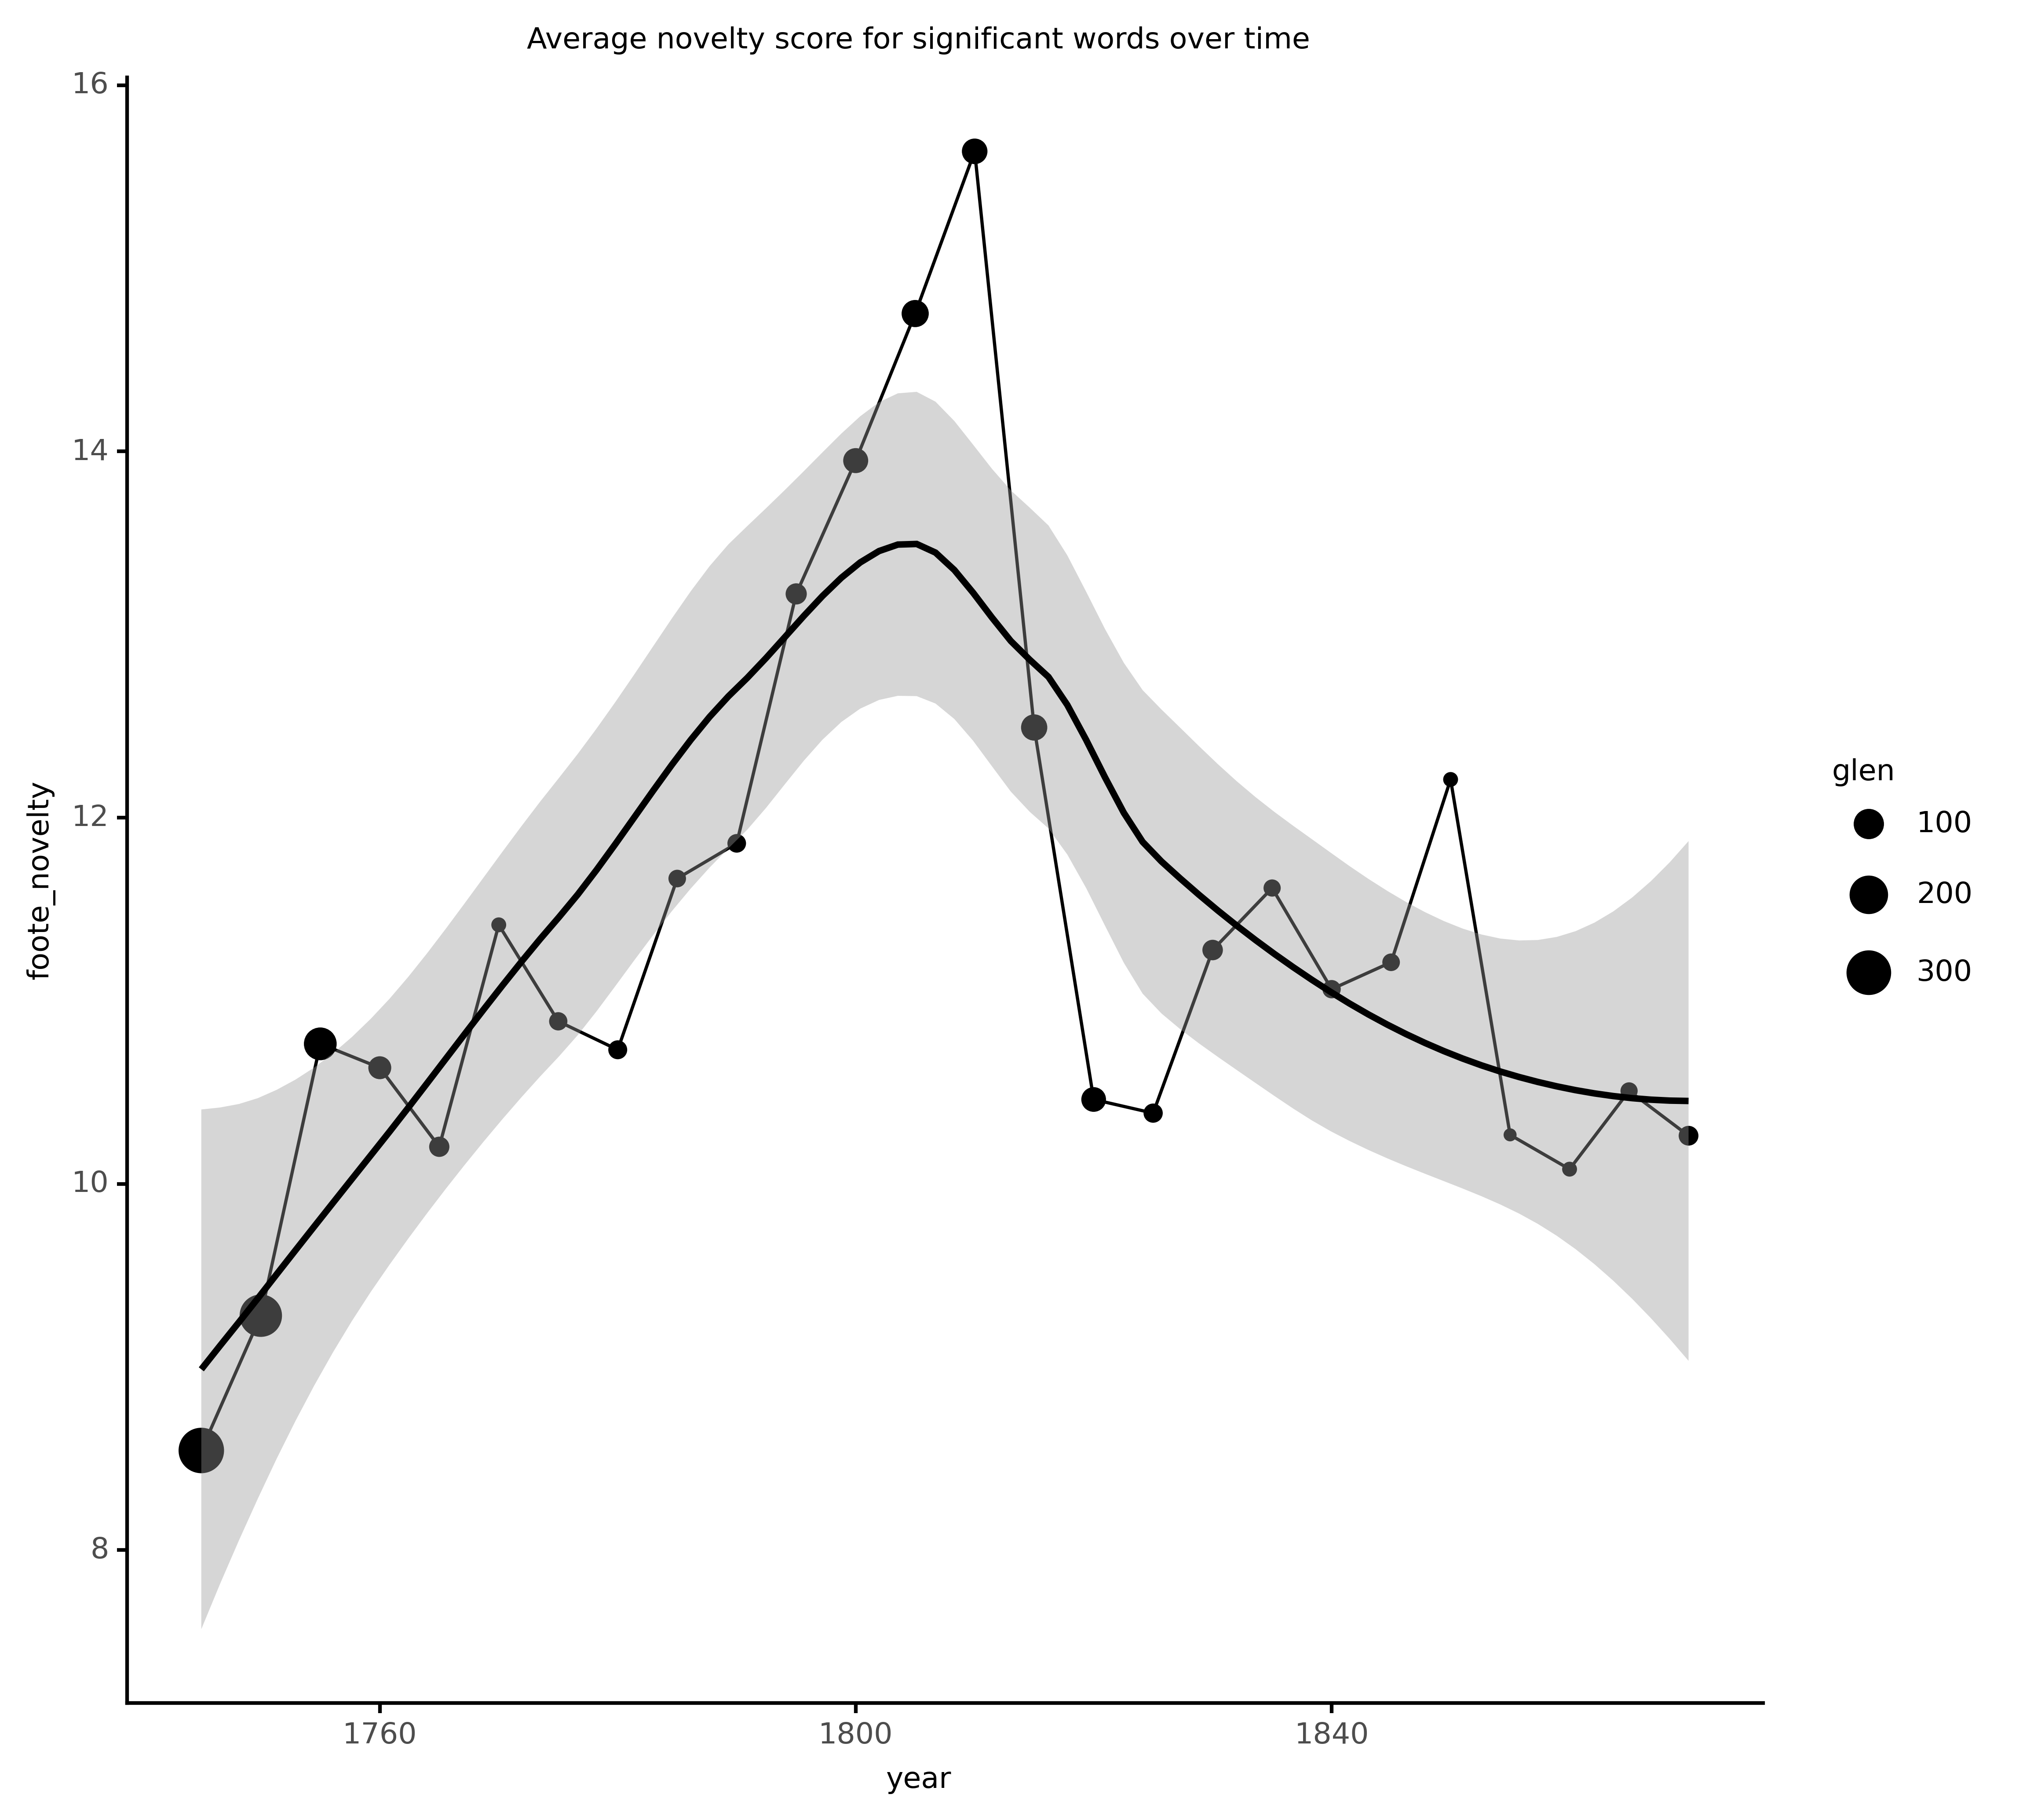

<ggplot: (8778227732381)>

In [10]:
figdf_mean=vsign.groupby('year').mean().reset_index()

fig=start_fig(figdf_mean, x='year', y='foote_novelty')
fig+=p9.geom_line()
fig+=p9.geom_point(p9.aes(size='glen'))
fig+=p9.geom_smooth()
fig+=p9.ggtitle('Average novelty score for significant words over time')
fig

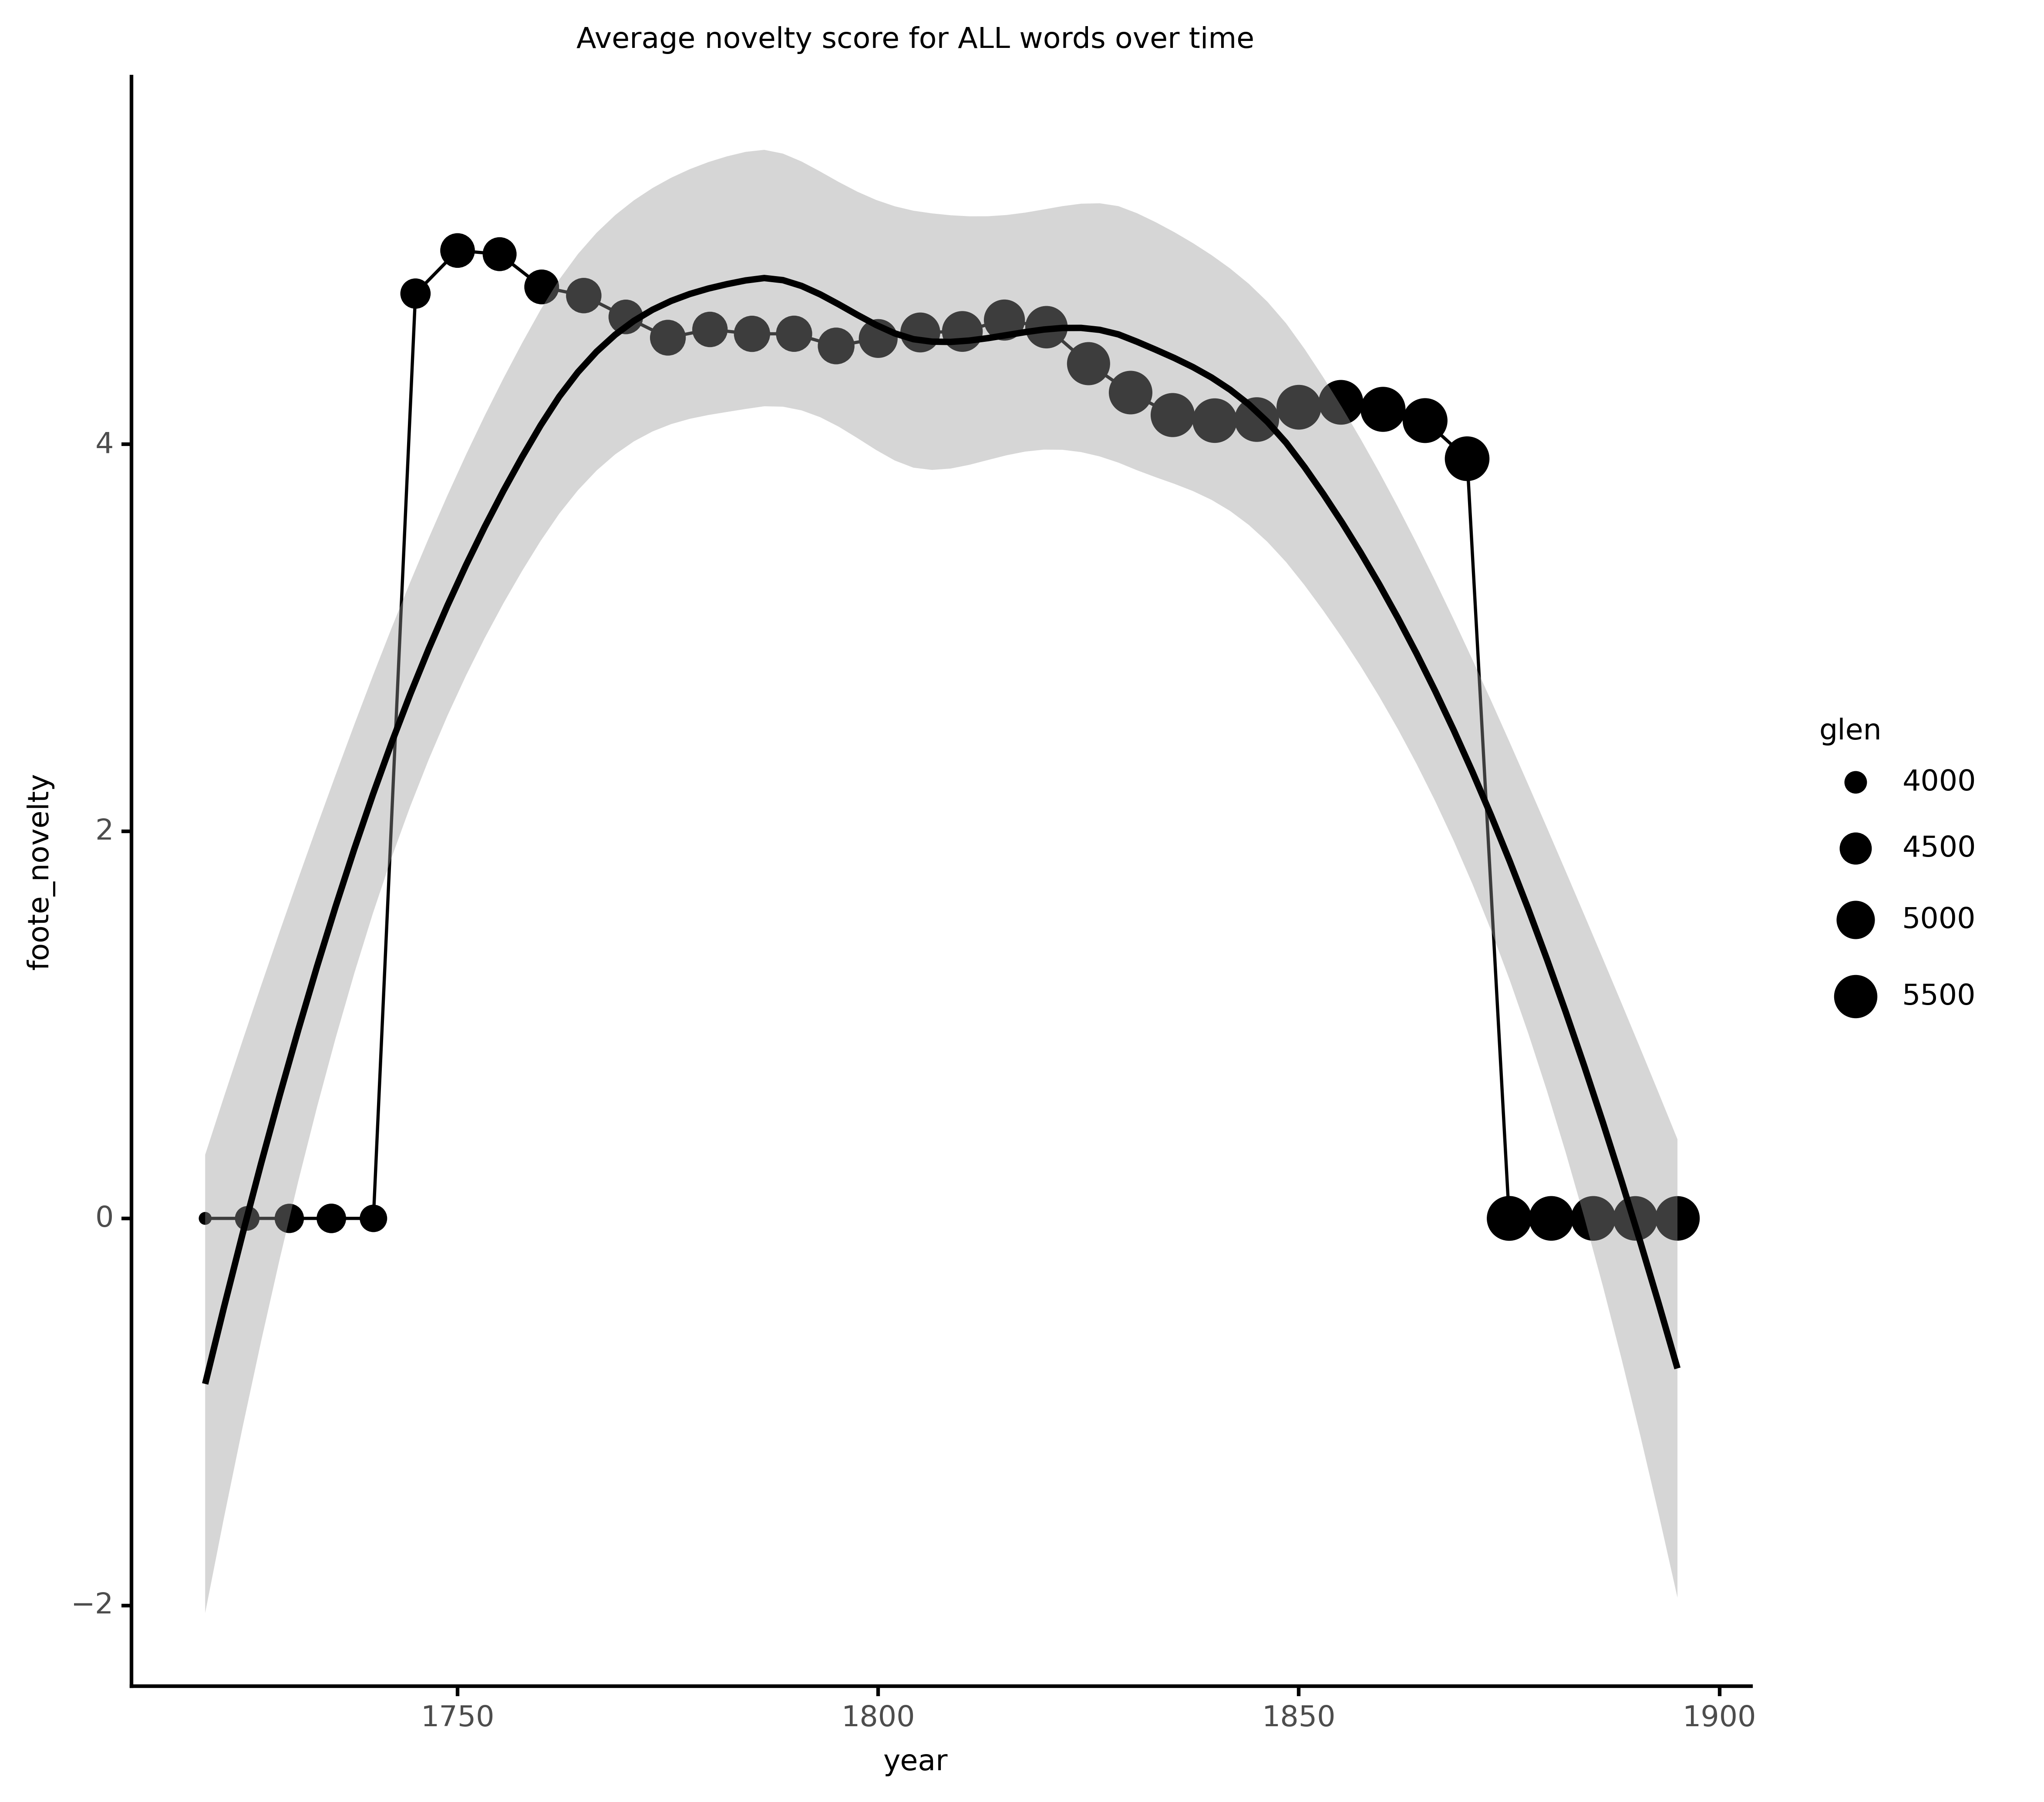

<ggplot: (8778220951337)>

In [11]:
figdf=pd.concat(grp.assign(glen=len(grp)) for i,grp in odf.query('foote_size==5').groupby('year'))
figdf_mean=figdf.groupby('year').mean().reset_index()

fig=start_fig(figdf_mean, x='year', y='foote_novelty')
fig+=p9.geom_line()
fig+=p9.geom_point(p9.aes(size='glen'))
fig+=p9.geom_smooth()
fig+=p9.ggtitle('Average novelty score for ALL words over time')
fig

In [12]:
vsign['dec']=[y//10*10 for y in vsign.year]
for i,grp in vsign[vsign.word.isin(get_words_ever_abs())].groupby('dec'):
    words=', '.join(
        w
        for w in grp.drop_duplicates('word').sort_values('foote_novelty',ascending=False).word
#         if 's' not in w and 'f' not in w
    )
    printm(f'''* **{int(i)}**: {words}''')


* **1740**: transfer, miracle, settlement, incident, pretender, review, void, supremacy, sentiment, participation, bible, confusion, compliment, calling, republic, admiration, freedom, representation, choice, impatience, proposal, publication, eternity, reformation, marriage, change, method, deference, speech, harmony, reward, term, repose, hearing, countenance, corruption, comfort, desire, self, emperor, point, world, form, monarch, question, grace, humour, mercy, trouble, cardinal, assistance, value, judge, pleasure, university, throne, theory, people, bishop, strength, contrary, sense, history, nation

* **1750**: sake, appointment, efficacy, assurance, citizen, disorder, correction, void, review, admiration, contentment, peerage, pretender, perusal, urge, unity, threat, symptom, intercession, pledge, melancholy, effort, malignity, discussion, bible, antidote, liberality, emotion, anxiety, succession, bigotry, perfidy, publication, borrowing, patient, reluctance, equivalent, recovery, remedy, information, exhibit, settlement, utility, grace, term, sex, patriotism, speech, avail, comfort, countenance, weakness, providence, perception, confusion, view, emperor, trouble, alliance, extent, cause, event, progress, degree, friendship, question, reward, prejudice, value, merit, pleasure, danger, world, reputation, empire, heaven

* **1760**: appointment, mode, judgement, challenge, succession, citizen, imbecility, correspondence, discussion, taxation, impropriety, accomplice, consolation, independence, heroine, refinement, vivacity, invasion, periodical, prayer, apostle, exactness, arc, antiquarian, war, treaty, empire, man

* **1770**: reform, judgement, mode, holiness, restitution, precedence, fellowship, magnitude, impudence, prosecutor, correspondence, commonwealth, independence, licence, retribution, prayer, ferocity

* **1780**: case, slave, reform, test, oracle, accommodation, adoption, trait, decree, licence, delineation, righteousness, advice, chancellor, lord

* **1790**: case, trait, institute, canning, decree, exception, regime, intellect, adoption, celibacy, warfare, revolution, demand, advice, originality, lord, condition, question, consequence

* **1800**: muff, fee, sect, slate, fame, conduit, case, sin, institute, mutt, missionary, canning, correctness, selection, deduction, depression, resurrection, predilection, state, hypocrite, magistrate, warfare, demand, stimulus, pope, interest, committee

* **1810**: fame, fee, muff, slate, conduit, sect, mutt, missionary, sin, stile, canning, distress, depression, execution, state, magistrate, approximation, applause, intensity, art, reverend, war, answer, account, peace, honour, power

* **1820**: slate, regent, excitement, slavery, malice, heretic, witness, execution, intensity, carelessness, manifestation, aristocracy, account, interest, author, peace, selfishness, power

* **1830**: muff, tenor, element, temperance, purification, interest, design, majesty

* **1840**: observer, assurance, tenor, malice, acquiescence, incarnation, thing

* **1850**: observer, thing, tranquillity, manner

* **1860**: recital, rendering, persuasion, avarice, service, thing, author

* **1870**: contention, rendering, criterion, communion, firm, agency, service, rule, nobility, reader

In [13]:
@interact
def showword(w='interest',show_biginfo=False):
    try:
        printm('# '+w)
        
        figdf=odf[odf.word==w]
        fig=start_fig(figdf, x='year', y='foote_novelty',figure_size=(5,1), text_size=6)
        p9.options.dpi=300
        fig+=p9.geom_line()
        fig+=p9.geom_point(data=figdf[figdf.p_peak<0.05])
        fig+=p9.geom_point(data=figdf[figdf.p_trough<0.05])
        display(fig)
        
        distdf=get_distmatrix_rateofchange(DF, words={w})
        plot_distmat(distdf)
    except Exception:
        pass

interactive(children=(Text(value='interest', description='w'), Checkbox(value=False, description='show_biginfo…

In [14]:
iplot_word_info()

interactive(children=(Text(value='culture', description='w'), IntSlider(value=1, description='rolling', max=5,…